In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x,y=make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [3]:
x.shape

(500, 2)

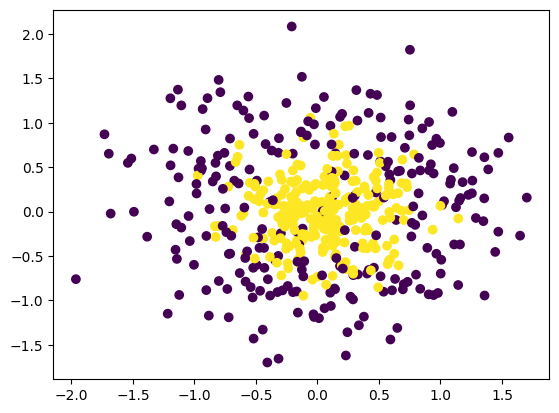

In [4]:
plt.scatter(x[:,0],x[:,1],c=y)

In [5]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)

In [6]:
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


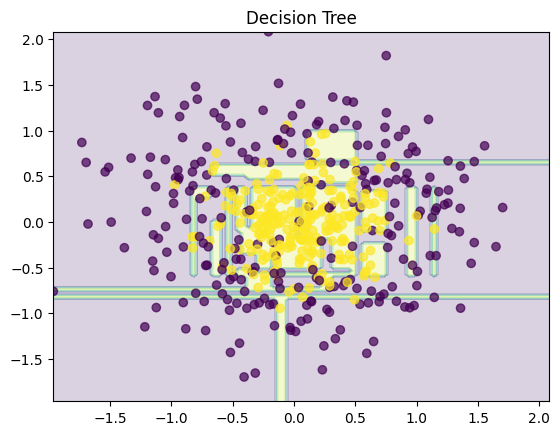

In [8]:
plt.Figure(figsize=(12,8))
x_range=np.linspace(x.min(),x.max(),100)
xx1,xx2=np.meshgrid(x_range,x_range)
y_hat=dt.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat=y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',alpha=0.7)
plt.title('Decision Tree')
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


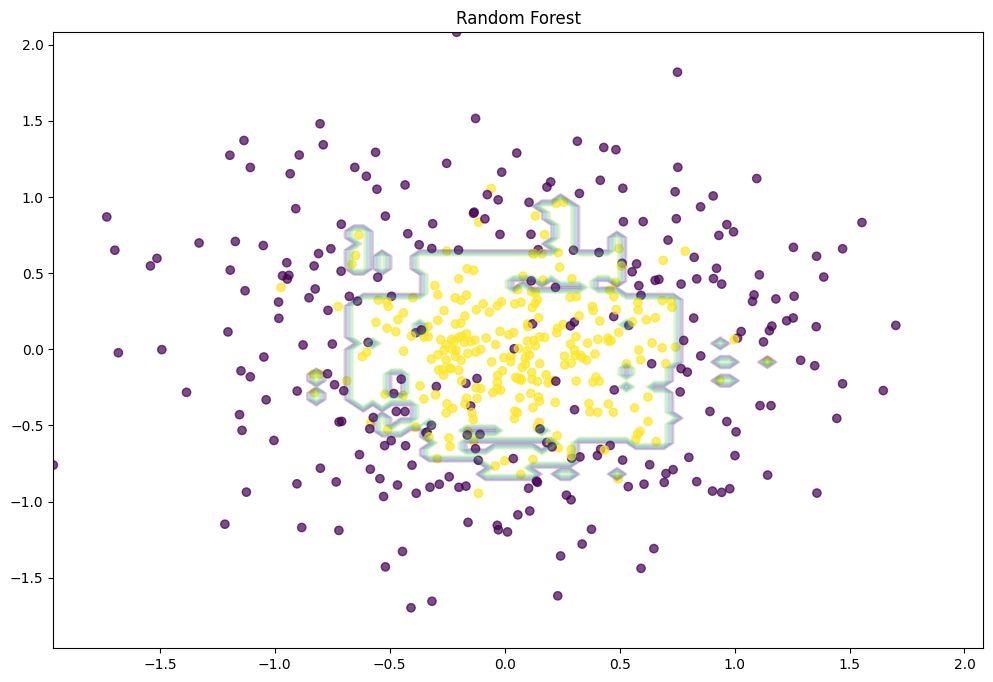

In [11]:
plt.figure(figsize=(12,8))
x_range=np.linspace(x.min(),x.max(),100)
xx1,xx2=np.meshgrid(x_range,x_range)
y_hat=rf.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat=y_hat.reshape(xx1.shape)
plt.contour(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',alpha=.7)
plt.title('Random Forest')
plt.show()

In [12]:
n_train=150
n_test=1000
noise=0.1

In [14]:
def f(X):
    X=X.ravel()
    return np.exp(-X**2)+1.5*np.exp(-(X-2)**2)

In [15]:
def generate(n_samples,noise):
    x=np.random.rand(n_samples)*10-5
    x=np.sort(x).ravel()
    y=np.exp(-x**2)+1.5*np.exp(-(x-2)**2)+np.random.normal(0.0,noise,n_samples)
    x=x.reshape(n_samples,1)
    return x,y

In [16]:
x_train,y_train=generate(n_samples=n_train,noise=noise)
x_test,y_test=generate(n_samples=n_test,noise=noise)

(-5.0, 5.0)

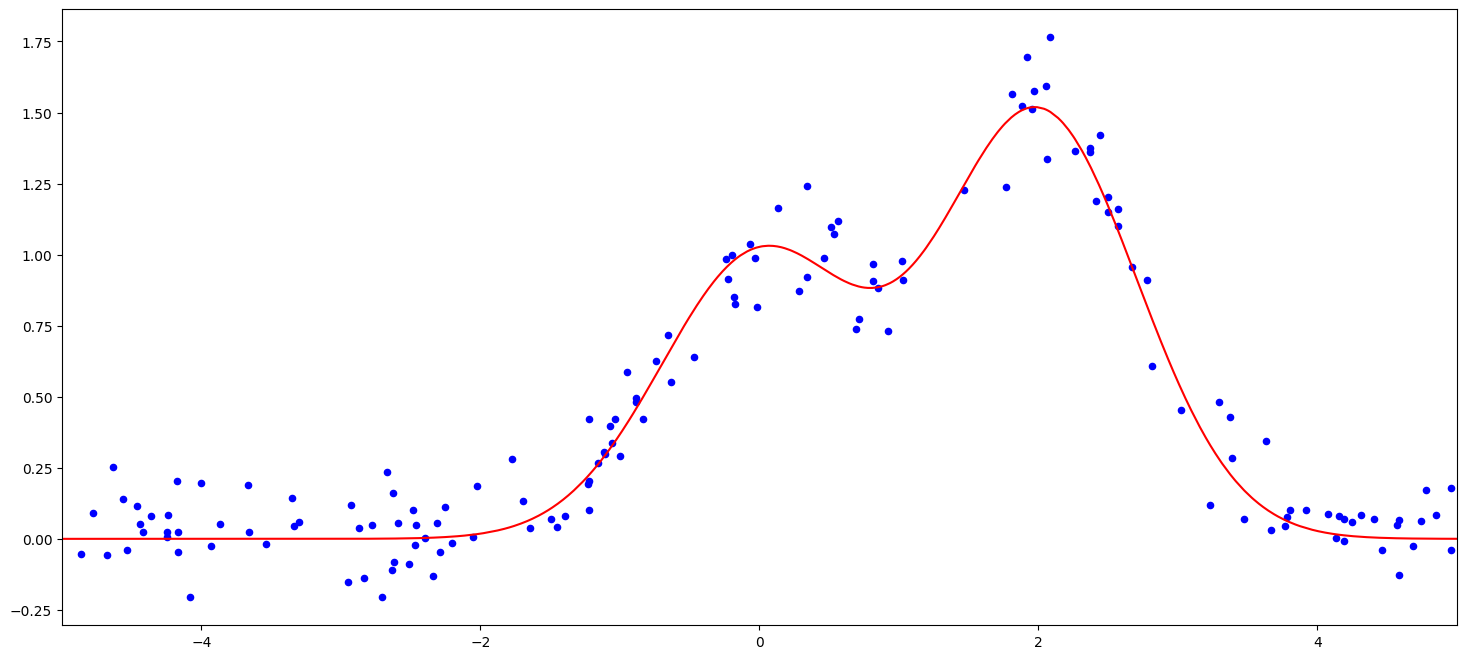

In [19]:
plt.figure(figsize=(18,8))
plt.plot(x_test,f(x_test),"r")
plt.scatter(x_train,y_train,c="b",s=20)
plt.xlim([-5,5])


Text(0.5, 1.0, 'Decision tree, MSE = 25.05')

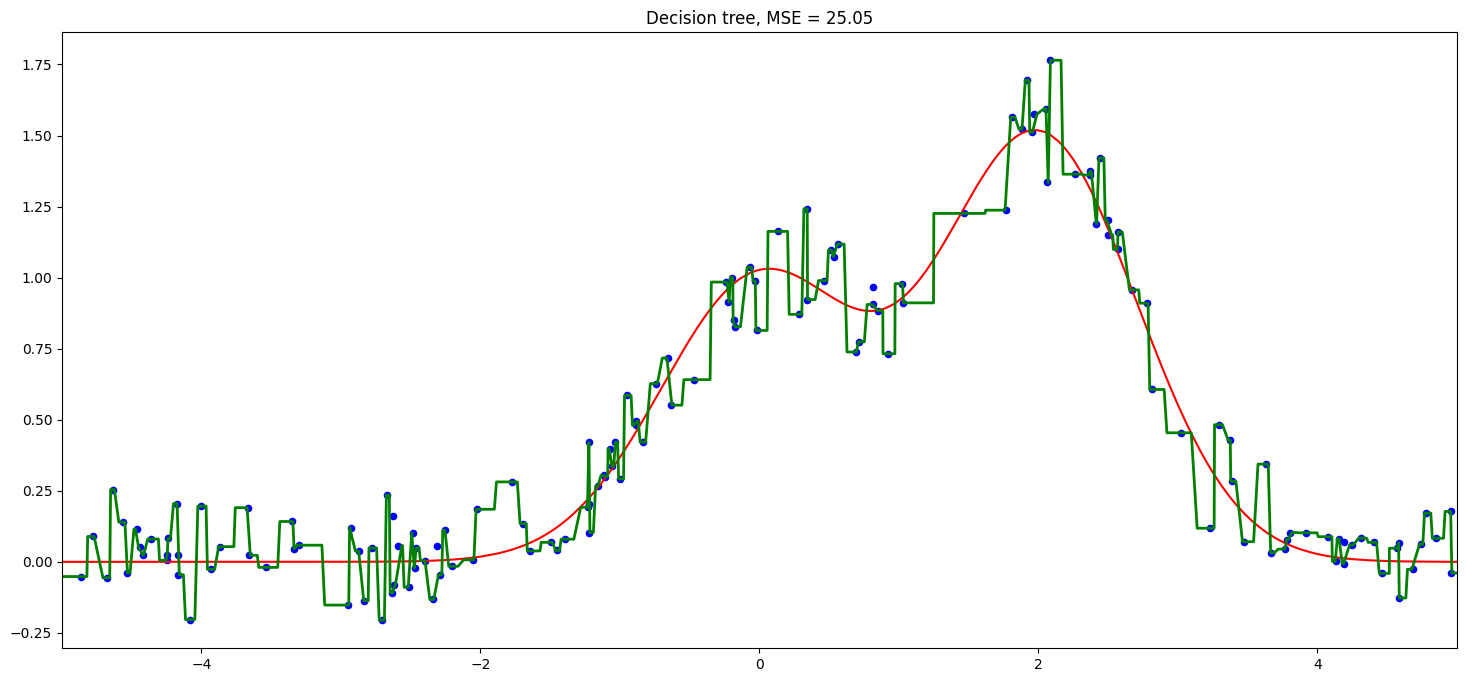

In [21]:


# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(x_train, y_train)
d_predict = dtree.predict(x_test)

plt.figure(figsize=(18, 8))
plt.plot(x_test, f(x_test), "r")
plt.scatter(x_train, y_train, c="b", s=20)
plt.plot(x_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))
     


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(x_train, y_train)
rf_predict = rfr.predict(x_test)

plt.figure(figsize=(18, 8))
plt.plot(x_test, f(x_test), "r")
plt.scatter(x_train, y_train, c="b", s=20)
plt.plot(x_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));